In [628]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import api_key
import scipy.stats as st
from api_keys import weather_api_key


# Real Estate Investing in Texas

### Top Questions we want Answered:
What are the top 20 cities in Texas for Airbnb?
What is the top city for Airbnb? 
Which city would be the best to buy in? - based on lowest avg home cost, occupancy rate potential and rental income potential

### Top 20 cities for Airbnb (based on Occupancy Rate)

In [3]:
api_key = api_key 

url = "https://mashvisor-api.p.rapidapi.com/trends/cities"

querystring = {"state":"TX","page":"1","items":"20"}

headers = {
	"content-type": "application/octet-stream",
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring).json()


In [676]:
city_data = pd.json_normalize(response["content"]["cities"])
city_data = city_data.sort_values(["occupancy"],ascending=False)
city_data["occupancy"]=city_data["occupancy"]
city_data = city_data.reset_index(drop= True)
city_data_cleaned=city_data.rename(columns={'city':"City","state":"State", "occupancy":"Occupancy %","total_listing":"Total Airbnb Listing","occ_listing":"Total Rental Listings"})
city_data_cleaned.to_csv("Output/citydata.csv")
city_data_cleaned

,City,State,Occupancy %,Total Airbnb Listing,Total Rental Listings
0,Denton,TX,61,451,27511
1,Abilene,TX,53,743,39379
2,Waco,TX,52,2752,143104
3,Fort Worth,TX,51,14972,763572
4,Round Rock,TX,51,614,31314
5,Irving,TX,49,918,44982
6,Austin,TX,47,16884,793548
7,San Marcos,TX,47,1356,63732
8,College Station,TX,43,589,25327
9,South Padre Island,TX,43,902,38786


### Which city has highest Occupancy rate and is that depend on the amout of Airbnb's available?

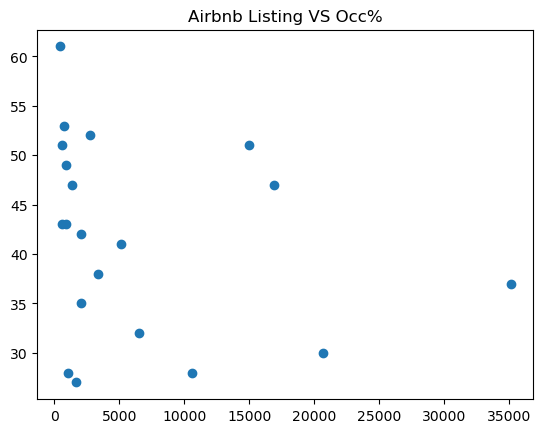

In [696]:
plt.scatter(city_data_cleaned["Total Airbnb Listing"],city_data_cleaned["Occupancy %"])
plt.title( "Airbnb Listing VS Occ%")
plt.savefig("Output/rentalvslisting.png")


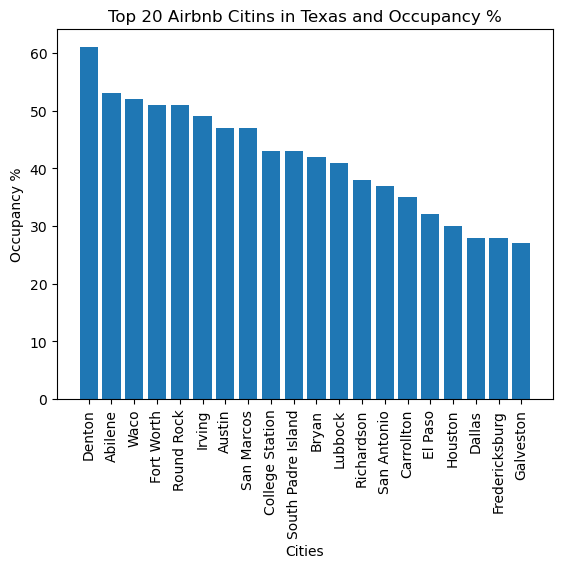

In [694]:

plt.bar(city_data_cleaned["City"],city_data_cleaned["Occupancy %"],alpha = 1, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Occupancy %")
plt.title("Top 20 Airbnb Citins in Texas and Occupancy %")
plt.savefig("Output/top20occrate.png")
plt.show()

###### Denton has the highest Occupancy rate and Galveston has the lowest. One possibility could be due to off season for Galeveston. 

In [12]:
#get lat and lon for mapping 
city = city_data_cleaned["City"]
latlon = []
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

city_url = f"{base_url}appid={weather_api_key}&units={units}&q="
for x in range(20):
    try:
        city = city_data_cleaned["City"][x]
        response_4 = requests.get(city_url + city).json()
        lat =  response_4["coord"]["lat"]
        lng = response_4["coord"]["lon"]
        latlon.append({"City":  city,"Lat": lat, "Lon":lng})
    except:
        pass
    


In [673]:

cities_coord = pd.DataFrame(latlon)
cities_coord_data = pd.merge(city_data_cleaned,cities_coord, on = ["City"], how ="left")
cities_coord_data

,City,State,Occupancy %,Total Airbnb Listing,Total Rental Listings,Airbnb Listing Ranges,Lat,Lon
0,Denton,TX,61,451,27511,"0-9,999",33.2001,-97.1336
1,Abilene,TX,53,743,39379,"0-9,999",32.4487,-99.7331
2,Waco,TX,52,2752,143104,"0-9,999",31.5493,-97.1467
3,Fort Worth,TX,51,14972,763572,"10,000-19,999",32.7254,-97.3208
4,Round Rock,TX,51,614,31314,"0-9,999",30.5083,-97.6789
5,Irving,TX,49,918,44982,"0-9,999",32.8140,-96.9489
6,Austin,TX,47,16884,793548,"10,000-19,999",30.2672,-97.7431
7,San Marcos,TX,47,1356,63732,"0-9,999",33.1434,-117.1661
8,College Station,TX,43,589,25327,"0-9,999",30.6280,-96.3344
9,South Padre Island,TX,43,902,38786,"0-9,999",26.1037,-97.1647


In [672]:
#run api to find occupancy rates per room size 
url = "https://mashvisor-api.p.rapidapi.com/airbnb-property/occupancy-rates"
studio = []
one_bed = []
two_bed = []
three_bed = []
four_bed =[]



state = "TX"
for x in range(20):
    try:
        city = city_data_cleaned["City"][x]
        
        querystring = {"state": state ,"city": city}
        headers = {
            "content-type": "application/octet-stream",
            "X-RapidAPI-Key": api_key,
            "X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
            }
        response_1 = requests.get(url, headers=headers, params=querystring).json()
        studio.append(response_1["content"]["occupancy_rates"]["studio"])
        one_bed.append(response_1["content"]["occupancy_rates"]["one_bedroom"])
        two_bed.append(response_1["content"]["occupancy_rates"]["two_bedrooms"])
        three_bed.append(response_1["content"]["occupancy_rates"]["three_bedrooms"])
        four_bed.append(response_1["content"]["occupancy_rates"]["four_bedrooms"])

    except:
        pass

In [680]:
rooms_data = pd.DataFrame({"City":city_data_cleaned["City"],"Studio Occupancy Rate":studio, "One Bedroom Occupancy Rate":one_bed,"Two Bedroom Occupancy Rate":two_bed,"Three Bedroom Occupancy Rate":three_bed, "Four Bedroom Occupancy Rate":four_bed})

rooms_data.to_csv("Output/Rooms_data.csv")
rooms_data

,City,Studio Occupancy Rate,One Bedroom Occupancy Rate,Two Bedroom Occupancy Rate,Three Bedroom Occupancy Rate,Four Bedroom Occupancy Rate
0,Denton,81,61,60,50,60
1,Abilene,69,52,50,46,54
2,Waco,51,51,50,49,60
3,Fort Worth,60,52,50,51,53
4,Round Rock,42,62,56,48,49
5,Irving,62,52,45,48,49
6,Austin,52,54,48,46,44
7,San Marcos,41,45,48,47,42
8,College Station,53,49,45,44,38
9,South Padre Island,43,43,53,41,34


### Which bedroom has the highest average occupancy rate?

In [16]:
#average for each room type
studio_avg = rooms_data["Studio Occupancy Rate"].mean()
one_bed_avg = rooms_data["One Bedroom Occupancy Rate"].mean()
two_bed_avg = rooms_data["Two Bedroom Occupancy Rate"].mean()
three_bed_avg = rooms_data["Three Bedroom Occupancy Rate"].mean()
four_bed_avg = rooms_data["Four Bedroom Occupancy Rate"].mean()

room_avg =pd.DataFrame({"Studio Avg": studio_avg, "One Bed Avg": one_bed_avg, "Two Bed Avg":two_bed_avg,"Three Bed Avg": three_bed_avg,"Four Bed Avg":four_bed_avg},index=[0])
room_avg

,Studio Avg,One Bed Avg,Two Bed Avg,Three Bed Avg,Four Bed Avg
0,47.4,44.55,42.6,40.45,42.95


In [17]:
#run api to find rental rates for differnt beds 
studio_rate = []
onebed_rate=[]
twobed_rate =[]
threebed_rate = []
fourbed_rate = []

url = "https://mashvisor-api.p.rapidapi.com/rental-rates"
for x in range(20):
    try:
        
        city = city_data_cleaned["City"][x]
        querystring = {"state":"TX","source":"airbnb","city": city}
    
        headers = {
             "content-type": "application/octet-stream",
             "X-RapidAPI-Key": api_key,
             "X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"}

        response_3= requests.get(url, headers=headers, params=querystring).json()
        studio_rate.append(response_3["content"]["retnal_rates"]["studio_value"])
        onebed_rate.append(response_3["content"]["retnal_rates"]["one_room_value"])
        twobed_rate.append(response_3["content"]["retnal_rates"]["two_room_value"])
        threebed_rate.append(response_3["content"]["retnal_rates"]["three_room_value"])
        fourbed_rate.append(response_3["content"]["retnal_rates"]["four_room_value"])
    except:
         pass



In [667]:
#turn api into a dataframe 
avg_rate=pd.DataFrame({"City":city_data_cleaned["City"],"Studio Avg Rental Rate":studio_rate,"One Bed Avg Rental Rate": onebed_rate,"Two Bed Avg Rental Rate":twobed_rate,"Three Bed Avg Rental Rate":threebed_rate,"Four Bed Avg Rental Rate":fourbed_rate})
avg_rate.to_csv("Output/AverageRentalRate.csv")
avg_rate

,City,Studio Avg Rental Rate,One Bed Avg Rental Rate,Two Bed Avg Rental Rate,Three Bed Avg Rental Rate,Four Bed Avg Rental Rate
0,Denton,2154,1405,2367,2759,4035
1,Abilene,1478,1233,1825,2215,3598
2,Waco,1503,1798,2264,3136,4523
3,Fort Worth,1604,1517,2195,2896,3575
4,Round Rock,1248,1952,2806,2725,3130
5,Irving,1423,1405,1520,2367,3439
6,Austin,1682,1788,2293,3346,4669
7,San Marcos,1543,1570,2233,2575,4653
8,College Station,2207,1561,1820,2998,3675
9,South Padre Island,1512,1823,2538,4031,5164


In [19]:
studio_rate_avg = avg_rate["Studio Avg Rental Rate"].mean()
onebed_rate_avg = avg_rate["One Bed Avg Rental Rate"].mean()
twobed_rate_avg = avg_rate["Two Bed Avg Rental Rate"].mean()
threebed_rate_avg = avg_rate["Three Bed Avg Rental Rate"].mean()
fourbed_rate_avg = avg_rate["Four Bed Avg Rental Rate"].mean()

total_avgs = pd.DataFrame({"Studio Total Avg Rate":studio_rate_avg,"One Bed Total Avg Rate":onebed_rate_avg,"Two Bed Total Avg Rate":twobed_rate_avg,"Three Bed Total Avg Rate": threebed_rate_avg,"Four Bed Total Avg Rate":fourbed_rate_avg},index=[0])
total_avgs

,Studio Total Avg Rate,One Bed Total Avg Rate,Two Bed Total Avg Rate,Three Bed Total Avg Rate,Four Bed Total Avg Rate
0,1350.85,1362.75,1808.85,2505.85,3507.9


### Four Bed has the Highest Average Rental rate rate, Which city has the highest Occupancy rate/ Avg Rental  for 4 bedrooms & does that effect occupancy rates? 

In [638]:
room_city_data = pd.merge(rooms_data,avg_rate,how="left", on = ["City"])

room_city_data

,City,Studio Occupancy Rate,One Bedroom Occupancy Rate,Two Bedroom Occupancy Rate,Three Bedroom Occupancy Rate,Four Bedroom Occupancy Rate,Studio Avg Rental Rate,One Bed Avg Rental Rate,Two Bed Avg Rental Rate,Three Bed Avg Rental Rate,Four Bed Avg Rental Rate
0,Denton,81,60,58,50,60,2154,1405,2367,2759,4035
1,Abilene,69,52,50,46,54,1478,1233,1825,2215,3598
2,Waco,51,50,50,49,60,1503,1798,2264,3136,4523
3,Fort Worth,60,52,50,49,52,1604,1517,2195,2896,3575
4,Round Rock,42,61,56,49,48,1248,1952,2806,2725,3130
5,Irving,62,52,41,47,49,1423,1405,1520,2367,3439
6,Austin,50,51,45,44,43,1682,1788,2293,3346,4669
7,San Marcos,41,47,45,43,45,1543,1570,2233,2575,4653
8,College Station,55,48,44,43,37,2207,1561,1820,2998,3675
9,South Padre Island,43,43,53,41,34,1512,1823,2538,4031,5164


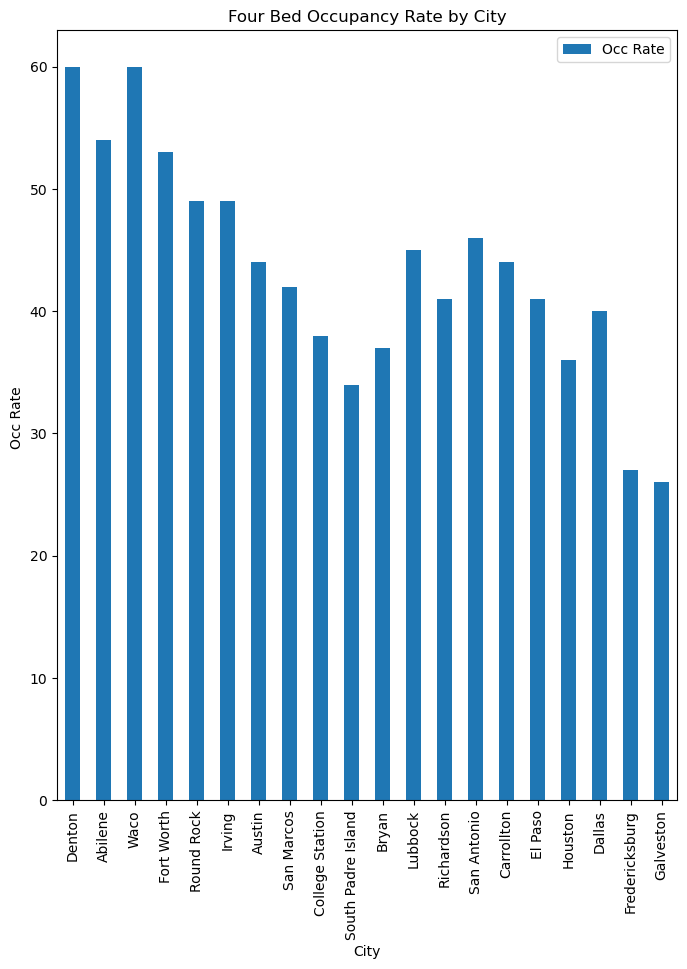

In [693]:
#which city has highest occ for 4 bed 
four_bed= rooms_data["Four Bedroom Occupancy Rate"]
city = rooms_data["City"]
four_bed = pd.DataFrame({"City":city,"Occ Rate":four_bed})
four_bed.plot(kind="bar",x="City",y="Occ Rate", figsize=(8,10), title ="Four Bed Occupancy Rate by City")
plt.ylabel("Occ Rate ")
plt.savefig("Output/FourBedOccRate.png")


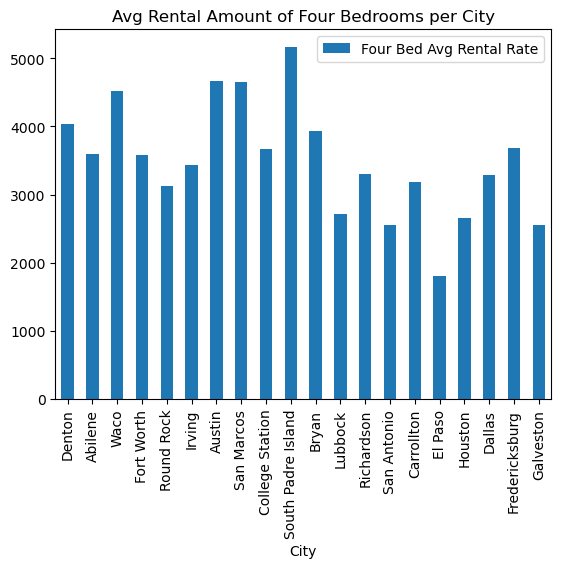

In [692]:
room_city_data.plot(kind="bar",x="City",y="Four Bed Avg Rental Rate",title = "Avg Rental Amount of Four Bedrooms per City")
plt.savefig("Output/FourBedRentalRate.png")

###### South Padre Island has the highest average rental amount for Airbnb's but, has the third lowest occupancy rate for 4 bedrooms 

The correltion between Occupancy % and Monthly Rental Rate for Four Bedrooms  is 0.22


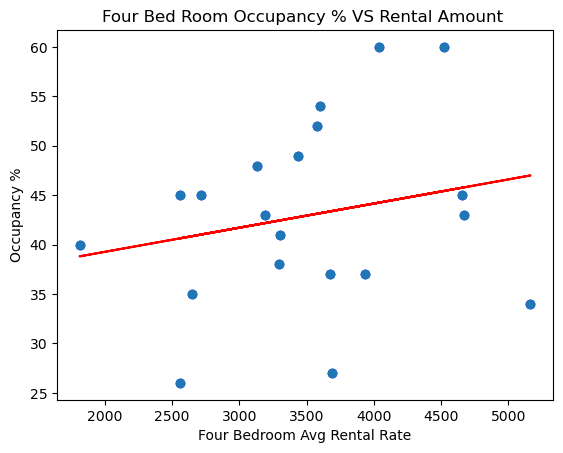

In [691]:
x_axis = room_city_data["Four Bed Avg Rental Rate"]
y_axis= room_city_data["Four Bedroom Occupancy Rate"]
plt.scatter(x_axis,y_axis, color ="blue")
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
print(f'The correltion between Occupancy % and Monthly Rental Rate for Four Bedrooms  is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
plt.ylabel("Occupancy %")
plt.xlabel("Four Bedroom Avg Rental Rate")
plt.title("Four Bed Room Occupancy % VS Rental Amount ")
plt.savefig("Output/FourbedOccRental.png")

###### There is almost no coorelation between the avg monthly rental and the occupancy rate for 4 bedrooms

### Property Data for top 20 cities in Texas

In [260]:
#run api to get data for the top 20 cities in Texas
beds=[]
baths= []
citieslist= []
prices = []
zestimates = []
sqft= []

for y in range (20):#len(city_data_cleaned["City"])):
    for x in range(20):
        



        url = "https://zillow56.p.rapidapi.com/search"
        city = city_data_cleaned["City"][y].lower()
        state = city_data_cleaned["State"][y].lower()
        querystring = {"location":city + ",  "+state ,"page":"1","status":"forSale"}

        headers = {
            "X-RapidAPI-Key": api_key,
            "X-RapidAPI-Host": "zillow56.p.rapidapi.com"
        }

        response_zillows= requests.get(url, headers=headers, params=querystring).json()
        try:
            beds.append(response_zillows["results"][x]["bedrooms"])
        except:
            beds.append('NaN')
        try:
            baths.append(response_zillows["results"][x]["bathrooms"])
        except:
            baths.append("NaN")
        try:
            citieslist.append(response_zillows["results"][x]["city"])
        except:
            citieslist.append("NaN")
        try:
            prices.append(response_zillows["results"][x]["price"])
        except:
            prices.append("NaN")
        try:
            sqft.append(response_zillows["results"][x]["livingArea"])
        except:
            sqft.append("NaN")
        try:
            zestimates.append(response_zillows["results"][x]["zestimate"])
        except:
            zestimates.append("NaN")
     
    time.sleep(2)

In [266]:
#add to a DF and print to csv 
propertydata = pd.DataFrame({"Cities":citieslist,"Bedrooms":beds,"Bathrooms":baths,"Living Space (SQ FT)":sqft,"Price":prices,"Zestimate":zestimates})
propertydata.to_csv("Output/PropertyData.csv")

propertydata.head()

,Cities,Bedrooms,Bathrooms,Living Space (SQ FT),Price,Zestimate
0,Denton,4.0,5.0,3677.0,749999.0,NaN
1,Denton,5.0,3.0,3173.0,729000.0,751546
2,Denton,3.0,2.0,1850.0,315000.0,319869
3,Denton,3.0,1.0,1604.0,285000.0,290916
4,Denton,5.0,4.0,3323.0,549000.0,561111


In [434]:
#open from csv so we dont have to run api agian
property_data = pd.read_csv("Output/PropertyData.csv")
property_data_cleaned = property_data.drop(['Unnamed: 0'],axis=1)
property_data_cleaned = property_data_cleaned.dropna(how="any")
property_data_cleaned = property_data_cleaned.reset_index(drop=True)
property_data_cleaned

,Cities,Bedrooms,Bathrooms,Living Space (SQ FT),Price,Zestimate
0,Denton,5.0,3.0,3173.0,729000.0,751546.0
1,Denton,3.0,2.0,1850.0,315000.0,319869.0
2,Denton,3.0,1.0,1604.0,285000.0,290916.0
3,Denton,5.0,4.0,3323.0,549000.0,561111.0
4,Shady Shores,3.0,2.0,1482.0,325000.0,332471.0
...,...,...,...,...,...,...
233,Galveston,1.0,1.0,757.0,139500.0,137640.0
234,Galveston,4.0,4.0,2000.0,535000.0,528885.0
235,Galveston,2.0,3.0,1296.0,650000.0,638792.0
236,Galveston,3.0,3.0,1717.0,599000.0,587975.0


## How does Size of the home effect the price?  How Accurate is the Zestimate?


The correltion between SQ FT and Price is 0.52


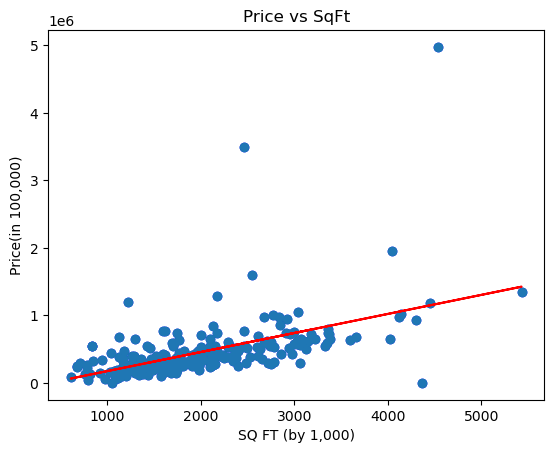

In [688]:
x_axis = property_data_cleaned["Living Space (SQ FT)"]
y_axis = property_data_cleaned["Price"]
plt.scatter(x_axis,y_axis, color ="blue")
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
print(f'The correltion between SQ FT and Price is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
plt.ylabel("Price(in 100,000)")
plt.xlabel("SQ FT (by 1,000)")
plt.title ("Price vs SqFt")
plt.savefig("Output/PriceSQFT.png")

The correltion between Zestimate and Price is 0.98


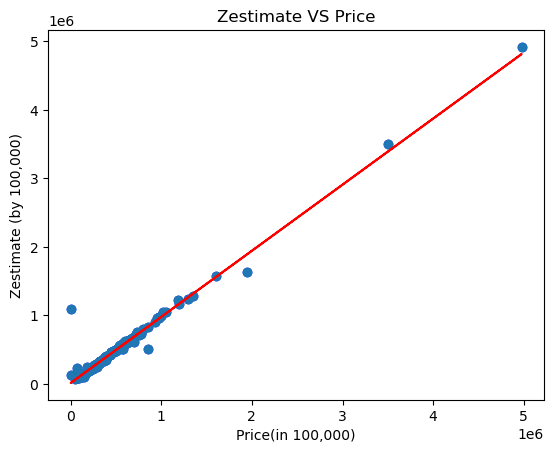

In [687]:
#find how accurate the Zestimate is
y_axis = property_data_cleaned["Zestimate"]
x_axis = property_data_cleaned["Price"]
plt.scatter(x_axis,y_axis, color ="blue")
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
print(f'The correltion between Zestimate and Price is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
plt.xlabel("Price(in 100,000)")
plt.ylabel("Zestimate (by 100,000)")
plt.title("Zestimate VS Price")
plt.savefig("Output/zestimatevsprice.png")

In [648]:
#Filter the data down to just the cities in the top 20 (not Suburbs)
avg_list = []
city_list =[]
cities = city_data_cleaned["City"]
for x in range(len(property_data_cleaned)):
    city = property_data_cleaned["Cities"][x]
    for city in cities:
        citylist.append(city)
        avg = property_data_cleaned[(property_data_cleaned["Cities"]==city)]["Price"].mean()
        max_cost= property_data_cleaned[(property_data_cleaned["Cities"]==city)]["Price"].max()
        min_cost = property_data_cleaned[(property_data_cleaned["Cities"]==city)]["Price"].min()
        avg_bath = property_data_cleaned[(property_data_cleaned["Cities"]==city)]["Bedrooms"].mean()
        avg_bed = property_data_cleaned[(property_data_cleaned["Cities"]==city)]["Bedrooms"].mean()
        avg_list.append({"City":city,"Avg Home Cost":avg, "Max Home Cost":max_cost,"Min Home Cost":min_cost,"Avg Bedrooms": avg_bed,"Avg Bathrooms":avg_bath})




In [666]:
price = pd.DataFrame(avg_list)
price.to_csv("Output/PropertyAverages.csv")
price.head()

,City,Avg Home Cost,Max Home Cost,Min Home Cost,Avg Bedrooms,Avg Bathrooms
0,Denton,433428.571429,729000.0,285000.0,3.857143,3.857143
1,Abilene,236850.000000,625000.0,60000.0,3.300000,3.300000
2,Waco,345226.666667,935000.0,109000.0,3.133333,3.133333
3,Fort Worth,462490.000000,1050000.0,219000.0,3.500000,3.500000
4,Round Rock,475247.500000,550000.0,375000.0,3.750000,3.750000


### What Type of home  / where do buy would be the best investment? 

The correltion between Occupancy % and Monthly Rental Rate for Four Bedrooms  is 0.12


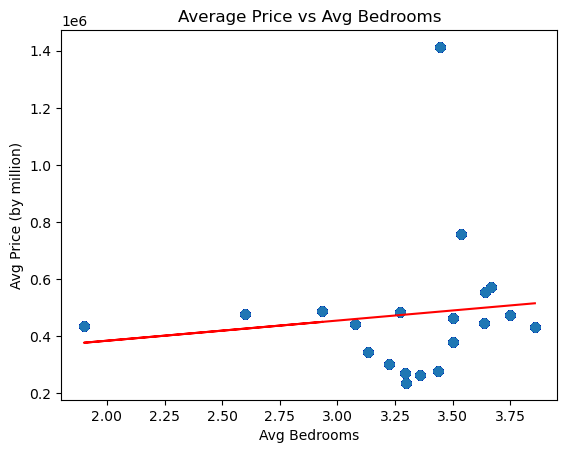

In [689]:
x_axis = price["Avg Bedrooms"]
y_axis=price["Avg Home Cost"]
plt.scatter(x_axis,y_axis, color ="blue")
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_axis,y_axis)
regress_values = x_axis *slope + intercept
line_eq='y=' + str(round(slope,2))+ 'x +' + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,'r-')
print(f'The correltion between Occupancy % and Monthly Rental Rate for Four Bedrooms  is {round(st.pearsonr(x_axis,y_axis)[0],2)}')
plt.title("Average Price vs Avg Bedrooms")
plt.ylabel("Avg Price (by million)")
plt.xlabel("Avg Bedrooms")
plt.savefig("Output/avgpricevsavgbedrooms.png")

###### there is roughly no coorelatiion between the average  bedrooms to the average home price 

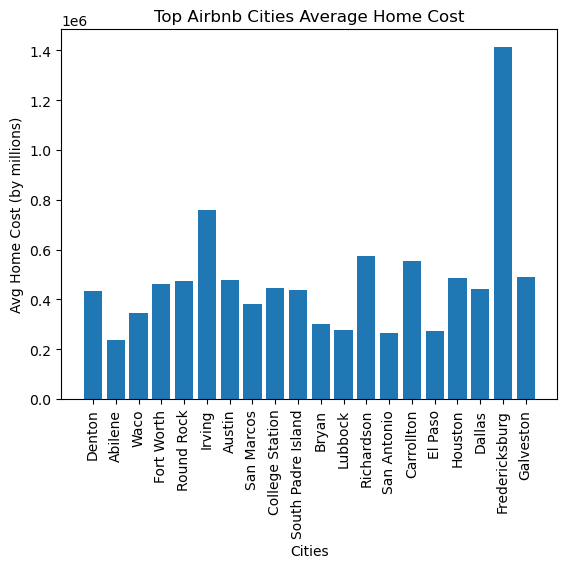

In [690]:
x_value = price["City"].unique()
y_value= price["Avg Home Cost"].unique()
plt.bar(x_value,y_value)
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Avg Home Cost (by millions)")
plt.title("Top Airbnb Cities Average Home Cost") 
plt.savefig("Output/Citiesavghomecost.png")
plt.show() 